<a href="https://colab.research.google.com/github/digdemorhan/Keras_With_Examples_For_Deep_Learning/blob/main/KerasFunctionalAPIExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Verisetinin yüklenmesi
from sklearn.datasets import load_wine
wine = load_wine()

In [3]:
#Verisetinin parçalanması
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=42)

In [22]:
#Modelin kurulması
import tensorflow as tf
tf.random.set_seed(42)
normal = tf.keras.layers.Normalization()
normal.adapt(X_train)
hiddenlayer = tf.keras.layers.Dense(64, activation="relu")
hiddenlayer2 = tf.keras.layers.Dense(64, activation="relu")
concat = tf.keras.layers.Concatenate()
output = tf.keras.layers.Dense(wine.target_names.shape[0], activation='softmax')

In [23]:
#Sinir ağı inşası
input1 = tf.keras.layers.Input(shape=X_train.shape[1:])
normalize = normal(input1)
hidden1 = hiddenlayer(normalize)
hidden2 = hiddenlayer2(hidden1)
concat1 = concat([normalize, hidden1])
output1 = output(concat1)
model = tf.keras.Model(inputs=[input1],outputs=[output1])

In [24]:
#Modelin özeti
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 13)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_3           │ (None, 13)             │             27 │ input_layer_6[0][0]    │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 64)             │            896 │ normalization_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 77)             │              0 │ normalization_3[0][0], │
│ (Concatenate)             │                        │                │ dense_9[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 3)              │            234 │ concatenate_3[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,157 (4.52 KB)

 Trainable params: 1,130 (4.41 KB)

 Non-trainable params: 27 (112.00 B)

In [25]:
#Modelin compile edilmesi ve eğitimi
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    epochs = 50,
    batch_size=10,
    validation_split = 0.2
)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.5189 - loss: 0.9914 - val_accuracy: 0.5556 - val_loss: 0.8965
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5499 - loss: 0.9629 - val_accuracy: 0.5556 - val_loss: 0.8709
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5917 - loss: 0.9371 - val_accuracy: 0.6667 - val_loss: 0.8461
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6297 - loss: 0.9125 - val_accuracy: 0.7037 - val_loss: 0.8223
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6432 - loss: 0.8887 - val_accuracy: 0.7037 - val_loss: 0.7993
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6539 - loss: 0.8659 - val_accuracy: 0.7407 - val_loss: 0.7772
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6759 - loss: 0.8439 - val_accuracy: 0.7407 - val_loss: 0.7559
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6625 - loss: 0.8227 - val_accuracy: 0.7407 - val_los

In [26]:
#Model değerlendirimi
test = model.evaluate(X_test, y_test)
print(f"Test Loss: {test[0]}")
print(f"Test Accuracy: {test[1]}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step - accuracy: 0.9051 - loss: 0.3183
Test Loss: 0.3325914144515991
Test Accuracy: 0.8888888955116272


In [27]:
#Model tahmini
import numpy as np
predictions = model.predict(X_test)
predictions_classes = np.argmax(predictions, axis=1)
print("Gerçek Değerler:", y_test)
print("Tahminler:", predictions_classes)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Gerçek Değerler: [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2]
Tahminler: [0 0 2 0 1 0 1 2 1 2 1 2 0 2 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 0
 2 1 1 0 1 1 2 2]


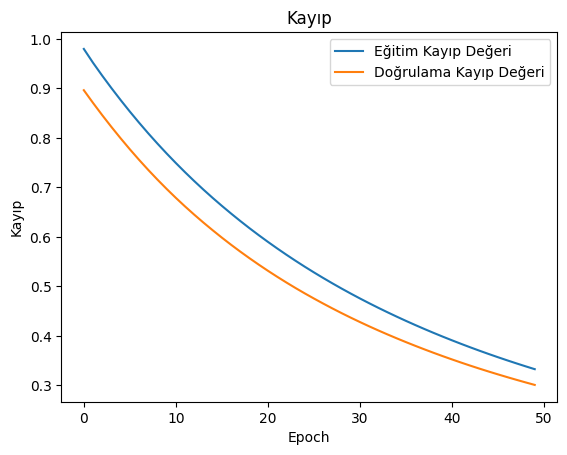

In [29]:
#Eğitim ve doğrulama kayıp değeri için veri görselleştirme
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label="Eğitim Kayıp Değeri")
plt.plot(history.history['val_loss'], label="Doğrulama Kayıp Değeri")
plt.title("Kayıp")
plt.xlabel("Epoch")
plt.ylabel("Kayıp")
plt.legend()
plt.show()

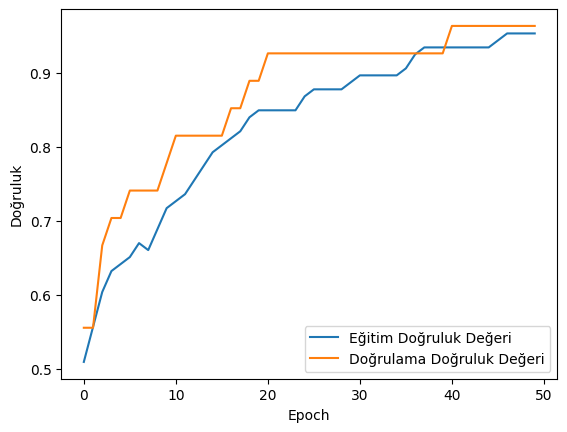

In [30]:
#Eğitim ve doğrulama doğruluğu için veri görselleştirme
plt.plot(history.history['accuracy'], label="Eğitim Doğruluk Değeri")
plt.plot(history.history['val_accuracy'], label="Doğrulama Doğruluk Değeri")
plt.xlabel("Epoch")
plt.ylabel("Doğruluk")
plt.legend()
plt.show()